In [1]:
import keras 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test)= keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
  
    class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

In [8]:
#show image

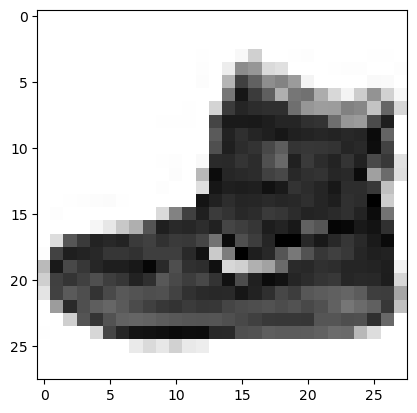

In [9]:
plt.imshow(X_train[0], cmap ="Greys")

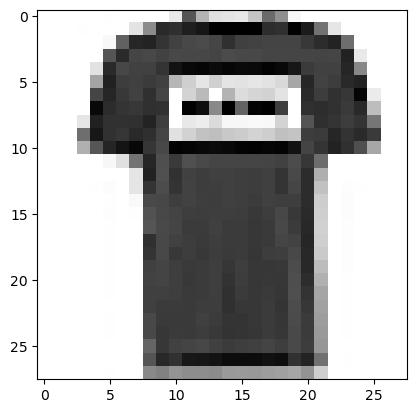

In [10]:
plt.imshow(X_train[1], cmap ="Greys")

In [11]:
y_test[1]

2

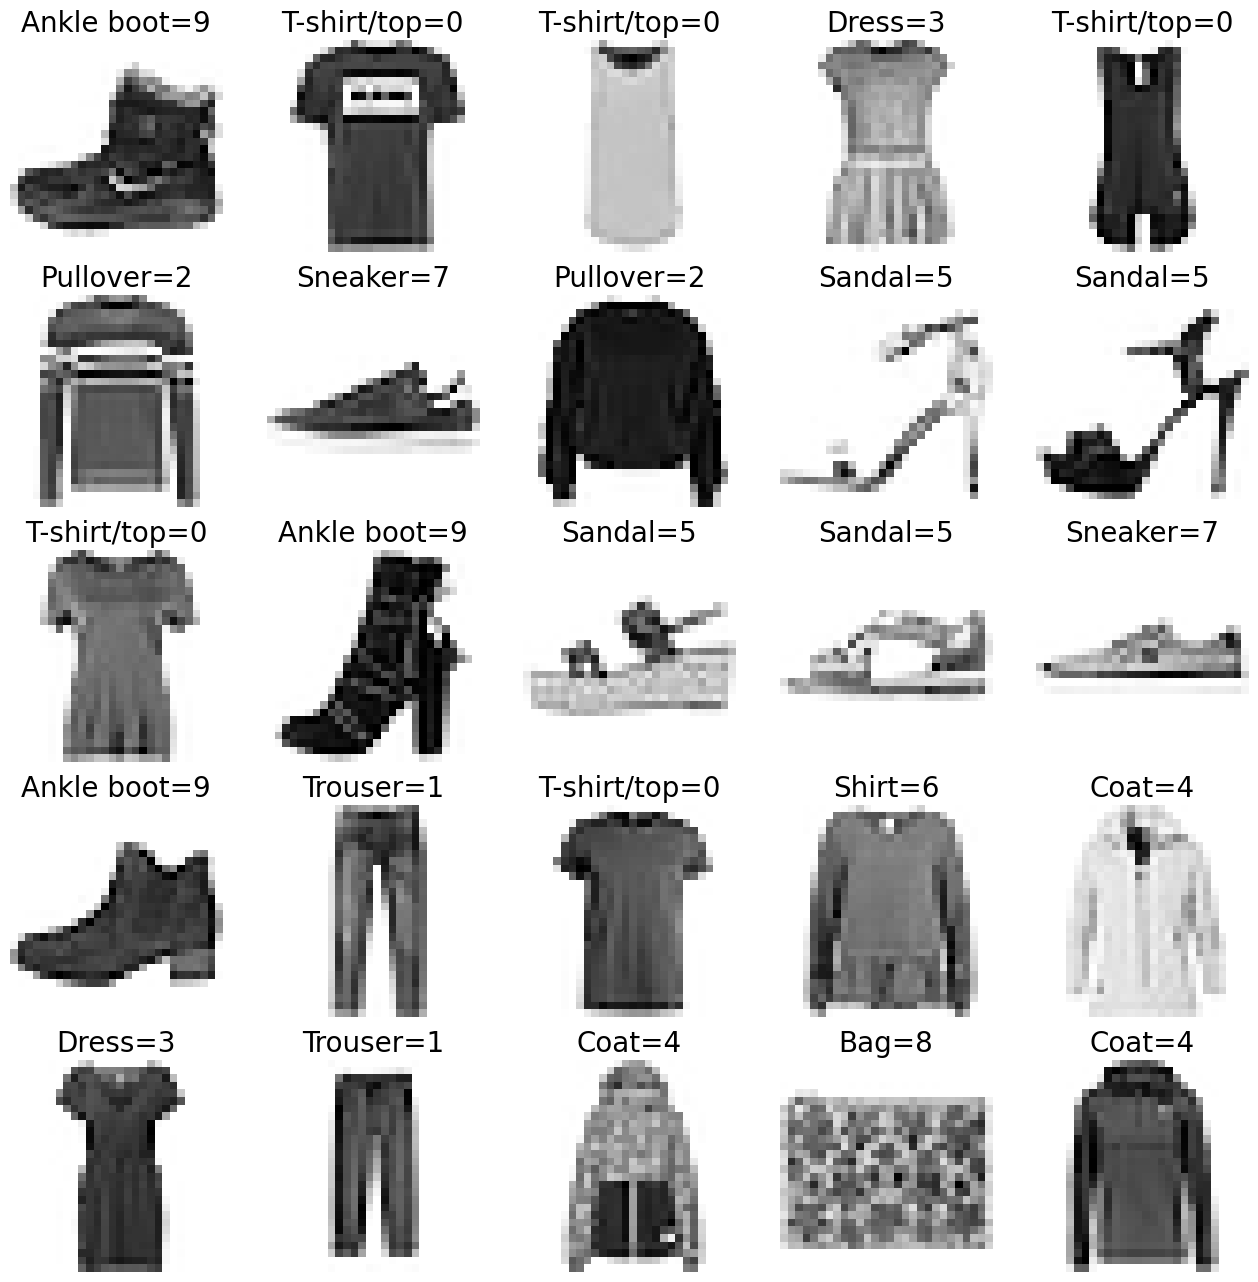

In [22]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)
 

In [23]:
X_train.ndim

3

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [26]:
X_train.ndim

4

In [27]:
X_train.shape

(60000, 28, 28, 1)

In [28]:
#Feature Scaling

In [29]:
X_train=X_train/255
X_test=X_test/255

In [30]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
#Split dataset

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train, y_val=train_test_split (X_train,y_train,test_size=0.2,random_state=2020)


In [32]:
X_train.shape,y_train.shape

((48000, 28, 28, 1), (48000,))

In [33]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

In [34]:
# cnn _model building

In [39]:
model = keras.models.Sequential([
                         keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(units=32, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
import tensorflow
layers = tensorflow.keras.layers
BatchNormalization = tensorflow.keras.layers.BatchNormalization
Conv2D = tensorflow.keras.layers.Conv2D
Flatten = tensorflow.keras.layers.Flatten
TensorBoard = tensorflow.keras.callbacks.TensorBoard
ModelCheckpoint = tensorflow.keras.callbacks.ModelCheckpoint

In [48]:
model=keras.models.Sequential([
                        keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='valid',activation='relu', input_shape=[28,28,1]),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(units=128, activation='relu'),
                        keras.layers.Dense(units=10, activation='softmax'),
])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [53]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.fit(X_train,y_train, epochs=10, batch_size=512,verbose=1, validation_data=(X_val,y_val))

Epoch 1/10
94/94 [==============================] - 12s 110ms/step - loss: 0.6314 - accuracy: 0.7850 - val_loss: 0.4380 - val_accuracy: 0.8438
Epoch 2/10
94/94 [==============================] - 10s 108ms/step - loss: 0.3935 - accuracy: 0.8627 - val_loss: 0.3673 - val_accuracy: 0.8749
Epoch 3/10
94/94 [==============================] - 10s 109ms/step - loss: 0.3456 - accuracy: 0.8800 - val_loss: 0.3546 - val_accuracy: 0.8774
Epoch 4/10
94/94 [==============================] - 10s 108ms/step - loss: 0.3216 - accuracy: 0.8871 - val_loss: 0.3274 - val_accuracy: 0.8867
Epoch 5/10
94/94 [==============================] - 10s 108ms/step - loss: 0.2960 - accuracy: 0.8961 - val_loss: 0.3092 - val_accuracy: 0.8929
Epoch 6/10
94/94 [==============================] - 10s 108ms/step - loss: 0.2749 - accuracy: 0.9039 - val_loss: 0.2975 - val_accuracy: 0.8970
Epoch 7/10
94/94 [==============================] - 10s 110ms/step - loss: 0.2602 - accuracy: 0.9078 - val_loss: 0.2926 - val_accuracy: 0.8993

In [55]:
# test the model

In [57]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

1/1 [==============================] - 0s 52ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97]],
      dtype=float32)

In [58]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

1/1 [==============================] - 0s 30ms/step


9

In [60]:
y_test[0]

9

In [61]:
y_pred=model.predict(X_test).round(2)

313/313 [==============================] - 1s 3ms/step


In [62]:
y_pred

array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.3 , 0.09, 0.  ]], dtype=float32)

In [63]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2828 - accuracy: 0.8965


[0.28281253576278687, 0.8964999914169312]

In [64]:
# Visualize Output

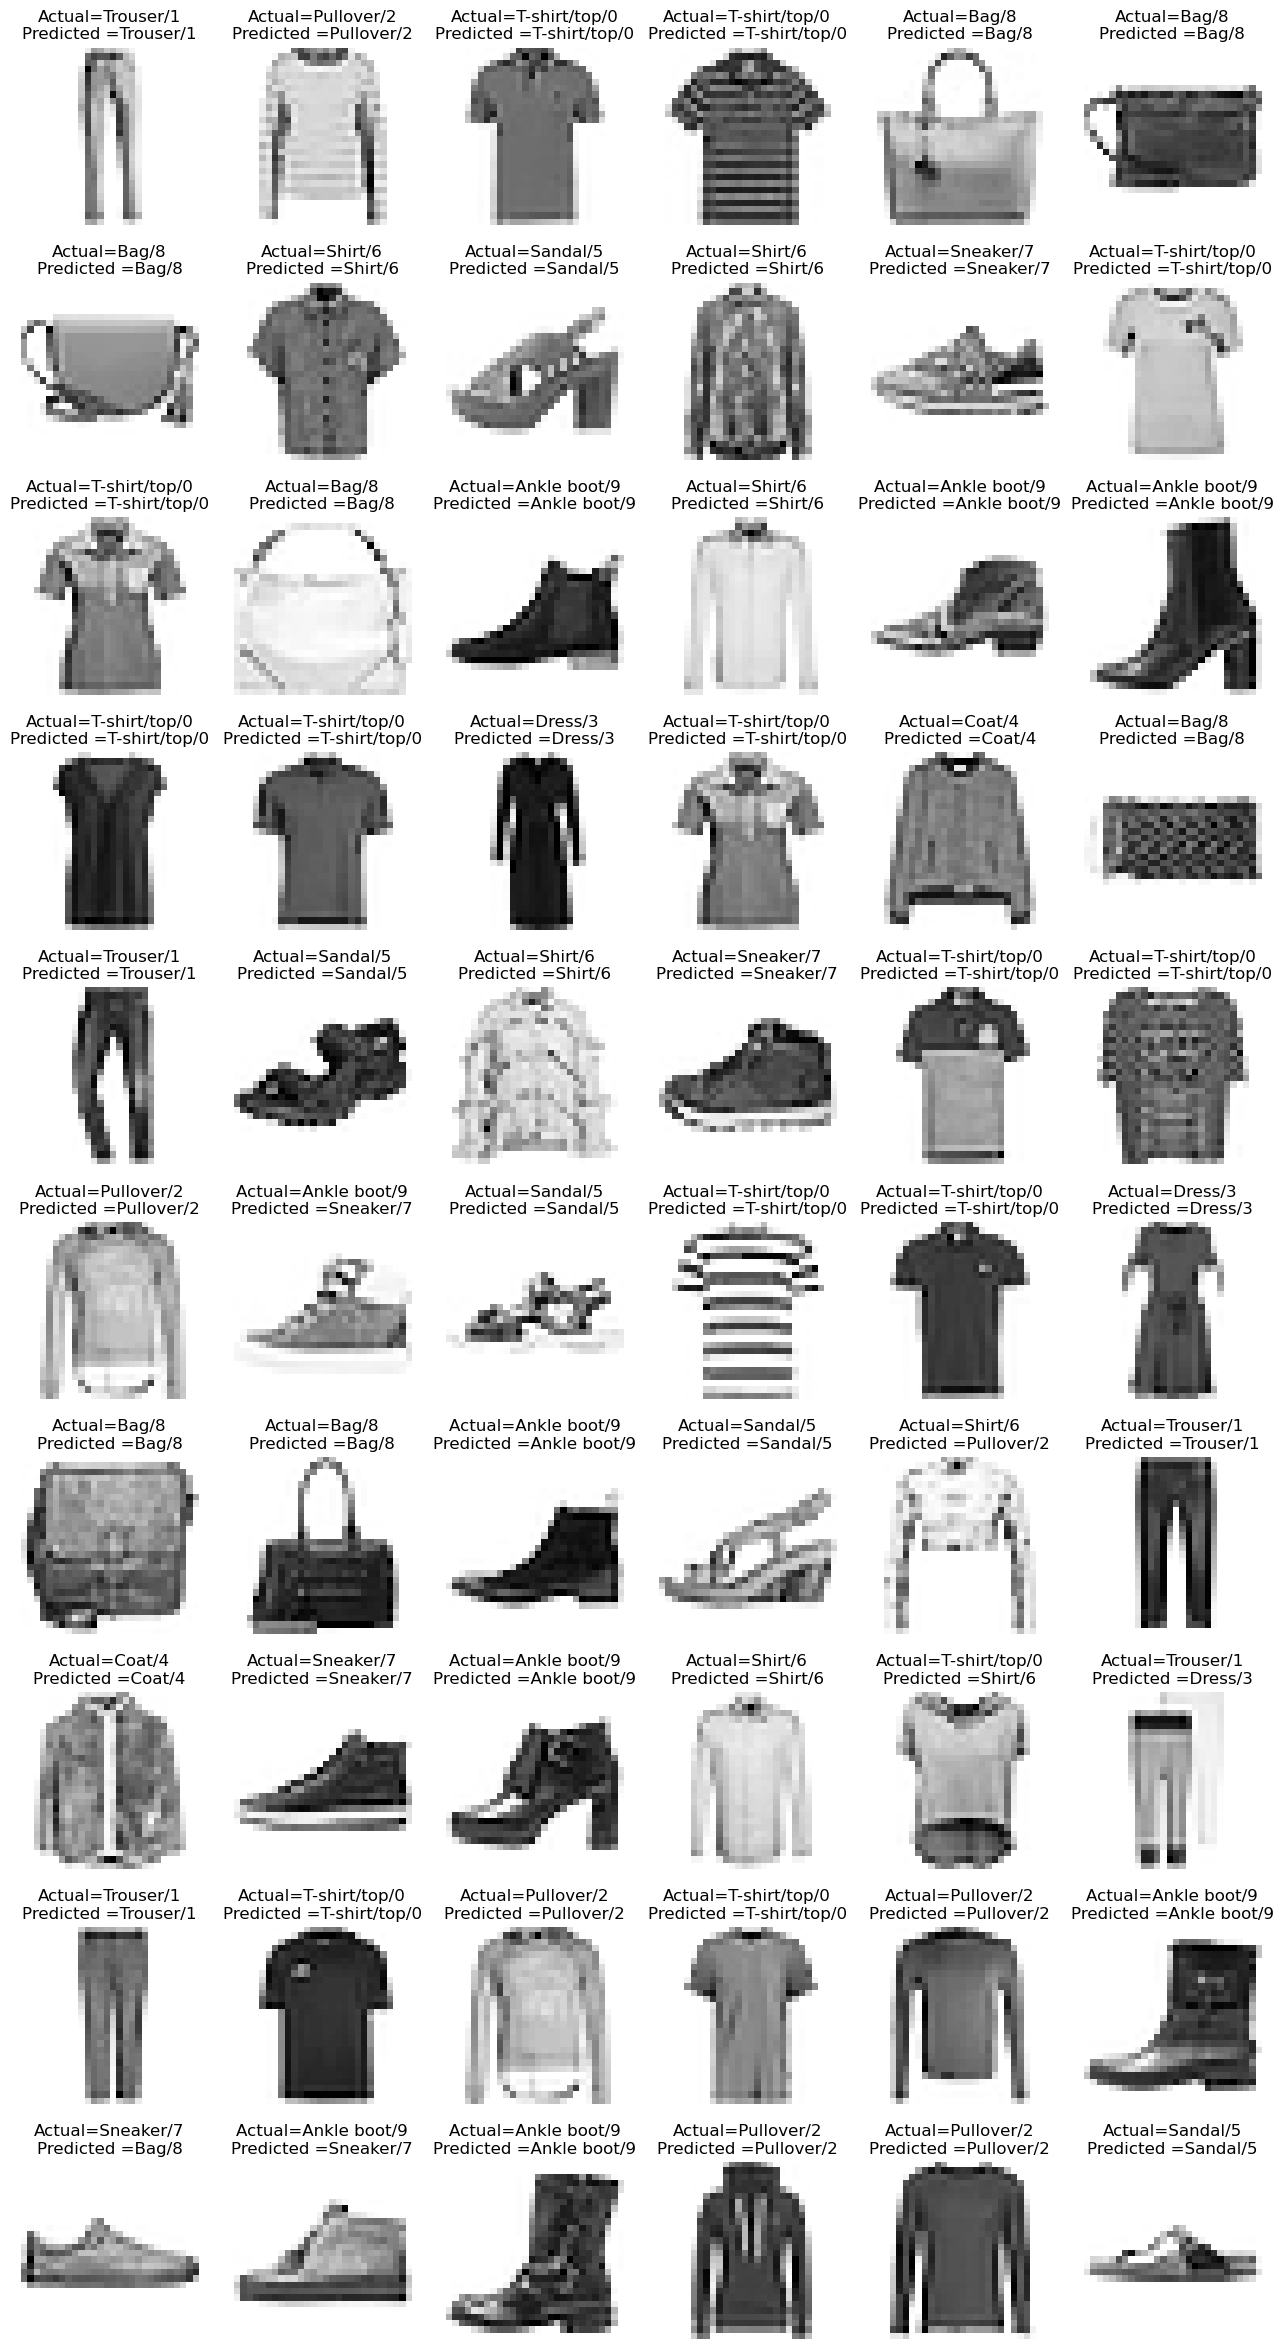

In [71]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,60):
    plt.subplot(10,6,j); j+=1
    plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
    plt.title('Actual={}/{}\nPredicted ={}/{}'.format(class_labels[y_test[i]],y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis('off')

In [72]:
# confusion matrix 

<Axes: >

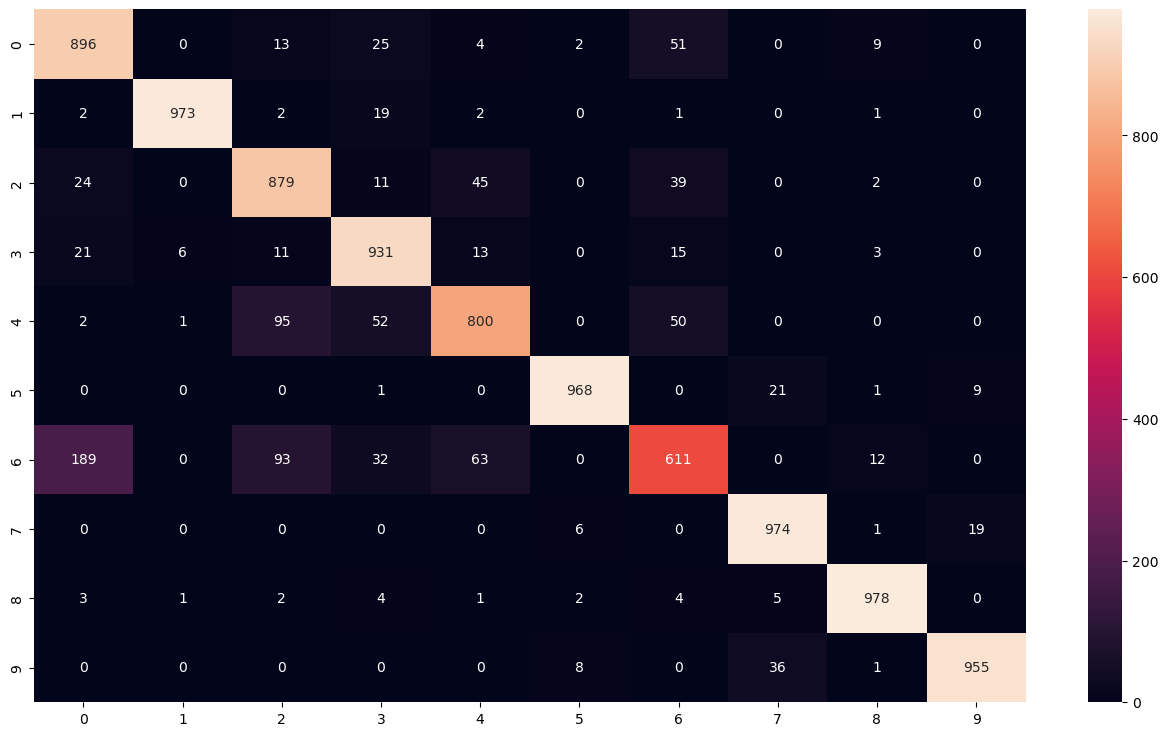

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [ np.argmax(i) for i in y_pred])
 
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt = "d")

<Axes: >

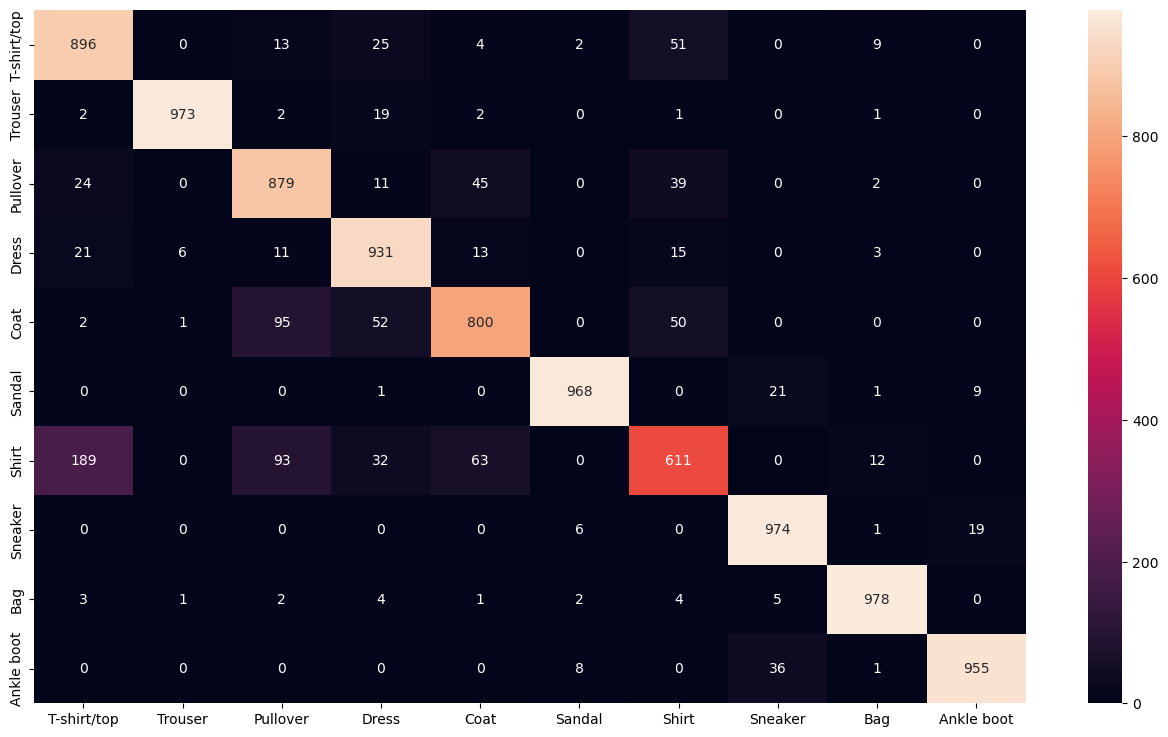

In [86]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)

#show cm
sns.heatmap(cm, annot=True,fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [77]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels, target_names=class_labels)

In [78]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.90      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.88      0.84      1000
       Dress       0.87      0.93      0.90      1000
        Coat       0.86      0.80      0.83      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.79      0.61      0.69      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



In [79]:
#Save model

model.save('fashin classification_cnn_model.h5')

In [81]:
model_deploy = keras.models.load_model('fashin classification_cnn_model.h5')

In [83]:
model_deploy.predict(X_test).round(2)

313/313 [==============================] - 1s 3ms/step


array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.3 , 0.09, 0.  ]], dtype=float32)

In [84]:
model_deploy.predict(np.expand_dims(X_test[0],axis=0)).round(2)

1/1 [==============================] - 0s 19ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97]],
      dtype=float32)

In [85]:
np.argmax(model_deploy.predict(np.expand_dims(X_test[0],axis=0)).round(2))

1/1 [==============================] - 0s 17ms/step


9